# Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cimcb_lite as cb
import seaborn as sns
import numpy as np
import scipy
import statsmodels

# Import data

In [2]:
workdir = ! echo $PWD
workdir = workdir[0]
workdir = '/'.join(workdir.split('/')[:-1]) + '/'
workdir

'/home/vincentm/MLnotebooks/Metabolomics_Training/'

## Peak Table

In [3]:
peakTable = pd.read_csv(workdir + 'data/peaks.csv')
peakTable

,Idx,QC,SampleType,SampleID,Batch,Class,Organism,Organism part,Protocol REF,Sample Name,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,1,1,QC,QC9,1,QC,Homo sapiens,urine,Sample collection,QC9,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,2,1,QC,QC10,1,QC,Homo sapiens,urine,Sample collection,QC10,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,3,0,Sample,p1t2,1,Patient,Homo sapiens,urine,Sample collection,p1t2,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,4,0,Sample,p3t4,1,Patient,Homo sapiens,urine,Sample collection,p3t4,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,5,0,Sample,K1,1,Control,Homo sapiens,urine,Sample collection,K1,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,1,QC,QC25,1,QC,Homo sapiens,urine,Sample collection,QC25,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,92,0,Sample,p4t6,1,Patient,Homo sapiens,urine,Sample collection,p4t6,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,93,0,Sample,p5t5,1,Patient,Homo sapiens,urine,Sample collection,p5t5,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,94,0,Blank,Blank4,1,Blank,blank,blank,Sample collection,Blank4,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


In [4]:
peakTable.columns

Index(['Idx', 'QC', 'SampleType', 'SampleID', 'Batch', 'Class', 'Organism',
       'Organism part', 'Protocol REF', 'Sample Name ',
       ...
       'M227', 'M228', 'M229', 'M230', 'M231', 'M232', 'M233', 'M234', 'M235',
       'M236'],
      dtype='object', length=248)

In [5]:
X = peakTable.iloc[:, [col[0] == 'M' for col in peakTable.columns]]
X

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8.424708e+06,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5.293281e+06,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,8.549699e+06,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5.584633e+06,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2.953297e+06,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2.200818e+06,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,6.524581e+06,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3.546574e+06,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,8.517687e+06,3.418264e+06,2.418852e+06,4.365211e+06,4.365211e+06,5.353033e+06,3.010000e+07,389607.8880,727946.2808,5.817263e+06,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,2.724794e+06,1.205375e+06,1.172044e+06,4.786256e+06,4.786256e+06,4.409136e+06,1.580000e+07,58527.0095,295618.1131,3.781715e+06,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,5.789542e+06,2.679931e+06,3.019433e+06,8.531440e+06,8.531440e+06,1.110000e+07,4.020000e+07,687231.2095,369766.4240,5.046373e+06,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,1.380929e+05,3.050297e+04,6.851811e+03,1.075518e+04,1.075518e+04,4.882751e+04,1.388751e+05,1096.7610,3144.2650,2.043413e+04,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


In [6]:
metadata = peakTable.iloc[:, [col[0] != 'M' for col in peakTable.columns]]
metadata

,Idx,QC,SampleType,SampleID,Batch,Class,Organism,Organism part,Protocol REF,Sample Name,Sample type,Sample collection type
0,1,1,QC,QC9,1,QC,Homo sapiens,urine,Sample collection,QC9,Quality control,NaN
1,2,1,QC,QC10,1,QC,Homo sapiens,urine,Sample collection,QC10,Quality control,NaN
2,3,0,Sample,p1t2,1,Patient,Homo sapiens,urine,Sample collection,p1t2,Patient 1,T2
3,4,0,Sample,p3t4,1,Patient,Homo sapiens,urine,Sample collection,p3t4,Patient 3,T4
4,5,0,Sample,K1,1,Control,Homo sapiens,urine,Sample collection,K1,Control K 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,1,QC,QC25,1,QC,Homo sapiens,urine,Sample collection,QC25,Quality control,NaN
91,92,0,Sample,p4t6,1,Patient,Homo sapiens,urine,Sample collection,p4t6,Patient 4,T6
92,93,0,Sample,p5t5,1,Patient,Homo sapiens,urine,Sample collection,p5t5,Patient 5,T5
93,94,0,Blank,Blank4,1,Blank,blank,blank,Sample collection,Blank4,Blank4,NaN


## Metabolites identification

In [7]:
met_id = pd.read_csv(workdir + 'data/metabolites_identification.csv')
met_id

,Idx,Name,Label,QC_RSD,Perc_missing,database_identifier,chemical_formula,smiles,inchi,metabolite_identification,taxid,species
0,1,M1,L-Valine,4.119400,0,CHEBI:16414,C5H11NO2,CC(C)[C@H](N)C(O)=O,"InChI=1S/C5H11NO2/c1-3(2)4(6)5(7)8/h3-4H,6H2,1...",L-Valine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
1,2,M2,L-Tyrosine,7.213483,0,CHEBI:17895,C9H11NO3,N[C@@H](Cc1ccc(O)cc1)C(O)=O,InChI=1S/C9H11NO3/c10-8(9(12)13)5-6-1-3-7(11)4...,L-Tyrosine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
2,3,M3,L-Tryptophan,7.825443,0,CHEBI:16828,C11H12N2O2,N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O,InChI=1S/C11H12N2O2/c12-9(11(14)15)5-7-6-13-10...,L-Tryptophan,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
3,4,M4,L-Threonine,9.196762,0,CHEBI:16857,C4H9NO3,C[C@@H](O)[C@H](N)C(O)=O,"InChI=1S/C4H9NO3/c1-2(6)3(5)4(7)8/h2-3,6H,5H2,...",L-Threonine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
4,5,M5,L-Homoserine,9.196762,0,CHEBI:15699,C4H9NO3,N[C@@H](CCO)C(O)=O,"InChI=1S/C4H9NO3/c5-3(1-2-6)4(7)8/h3,6H,1-2,5H...",L-Homoserine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...
231,232,M232,octenoyl-L-carnitine,6.511420,0,CHEBI:85526,C15H27NO4,C[N+](C)(C)C[C@@H](CC([O-])=O)OC([*])=O,NaN,octenoyl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
232,233,M233,nonayl-L-carnitine,16.569282,0,CHEBI:70997,C16H31NO4,CCCCCCCCC(=O)OC(CC([O-])=O)C[N+](C)(C)C,InChI=1S/C16H31NO4/c1-5-6-7-8-9-10-11-16(20)21...,nonayl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
233,234,M234,propionylglycine,18.489419,0,CHEBI:89836,C5H9NO3,C(CNC(=O)CC)(=O)O,"InChI=1S/C5H9NO3/c1-2-4(7)6-3-5(8)9/h2-3H2,1H3...",propionylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
234,235,M235,tiglylglycine,16.673262,0,CHEBI:73018,C7H11NO3,CC=C(/C)C(=O)NCC(O)=O,InChI=1S/C7H11NO3/c1-3-5(2)7(11)8-4-6(9)10/h3H...,tiglylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens


# Explore data

### Basic ckecklist :

#### Form analysis :
- __target__ (classification) : Class
- __shape__ (rows, columns) :
    - peakTable : (95, 248)
    - met_id : (236, 12)
- __features types__ :
    - qualitative (object) : [...]
    - quantitative (int) : [...]
    - quantitative (float) : [...]
- __missing values__ :
    - [...]

#### Content analysis :
- __target visualisation__ :
    - barplot below
- __feature visualisation__ :
    - follow a normal distribution or not ?
    - easily separate Patient vs. Control ?
- __relation features/target__ :
    - [...]
- __relation features/features__ : strong correlations between some of the features --> need to reduce the dimension for further analysis

#### __target__ (classification)

In [8]:
peakTable['Class']

0          QC
1          QC
2     Patient
3     Patient
4     Control
       ...   
90         QC
91    Patient
92    Patient
93      Blank
94         QC
Name: Class, Length: 95, dtype: object

In [9]:
peakTable['Class'].value_counts()

Patient    50
Control    23
QC         18
Blank       4
Name: Class, dtype: int64

<AxesSubplot:>

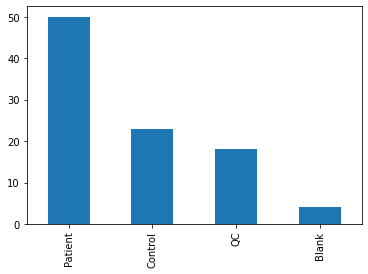

In [10]:
peakTable['Class'].value_counts().plot.bar()

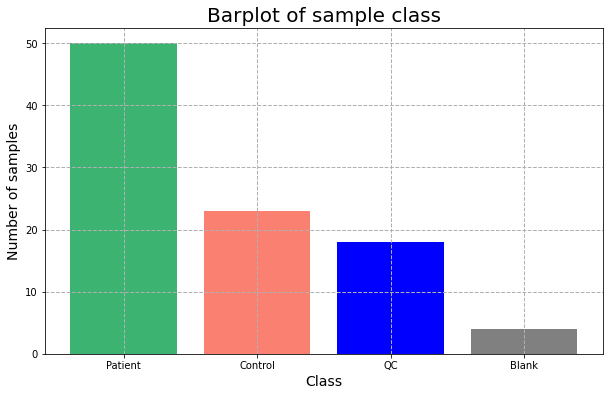

In [11]:
plt.figure(figsize=(10,6))
plt.bar(peakTable['Class'].value_counts().index, peakTable['Class'].value_counts(), color=['mediumseagreen', 'salmon', 'blue', 'grey'])

plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of samples', fontsize=14)
plt.title('Barplot of sample class', fontsize=20)
plt.grid(linestyle='--', linewidth=1)

plt.show()

#### __shape__ : 

In [12]:
peakTable.shape

(95, 248)

In [13]:
met_id.shape

(236, 12)

#### __feature types__ :

In [14]:
peakTable.dtypes.value_counts()

float64    236
object       9
int64        3
dtype: int64

In [15]:
peakTable.dtypes[peakTable.dtypes == 'int64']

Idx      int64
QC       int64
Batch    int64
dtype: object

In [16]:
peakTable.dtypes[peakTable.dtypes == 'object']

SampleType                object
SampleID                  object
Class                     object
Organism                  object
Organism part             object
Protocol REF              object
Sample Name               object
Sample type               object
Sample collection type    object
dtype: object

In [17]:
peakTable.dtypes[peakTable.dtypes == 'float64']

M1      float64
M2      float64
M3      float64
M4      float64
M5      float64
         ...   
M232    float64
M233    float64
M234    float64
M235    float64
M236    float64
Length: 236, dtype: object

In [18]:
met_id.dtypes.value_counts()

object     9
int64      2
float64    1
dtype: int64

<AxesSubplot:>

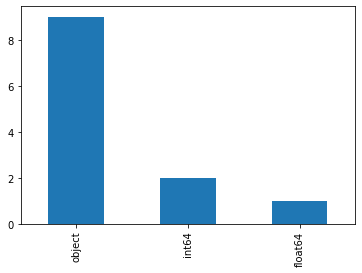

In [19]:
met_id.dtypes.value_counts().plot.bar()

#### __missing values__

In [20]:
X.isna().sum().sum()

47

Features :

In [21]:
X.isna().sum(axis=1).value_counts()

0    69
1    18
2     4
5     2
8     1
3     1
dtype: int64

Samples :

In [22]:
X.isna().sum(axis=0).value_counts()

0     218
1       8
3       5
2       2
11      1
5       1
4       1
dtype: int64

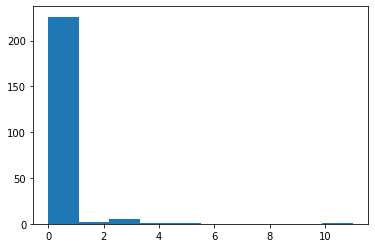

In [23]:
plt.hist(X.isna().sum())
plt.show()

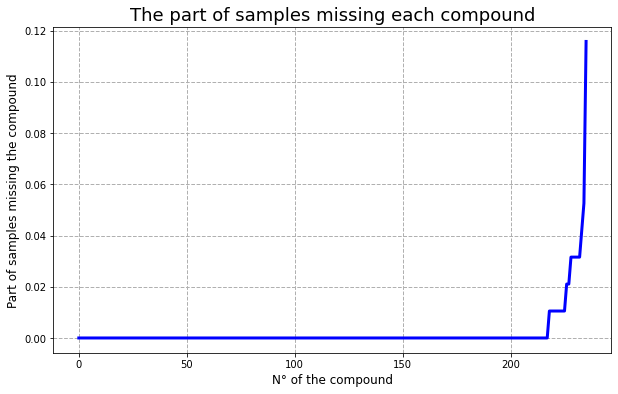

In [24]:
plt.figure(figsize=(10,6))
perc_mv = X.isna().sum() / X.shape[0]
plt.plot(perc_mv.sort_values().values, color='b', linewidth=3)
plt.xlabel('N° of the compound', fontsize=12)
plt.ylabel('Part of samples missing the compound', fontsize=12)
plt.title('The part of samples missing each compound', fontsize=18)
plt.grid(linestyle='--', linewidth=1)
plt.show()

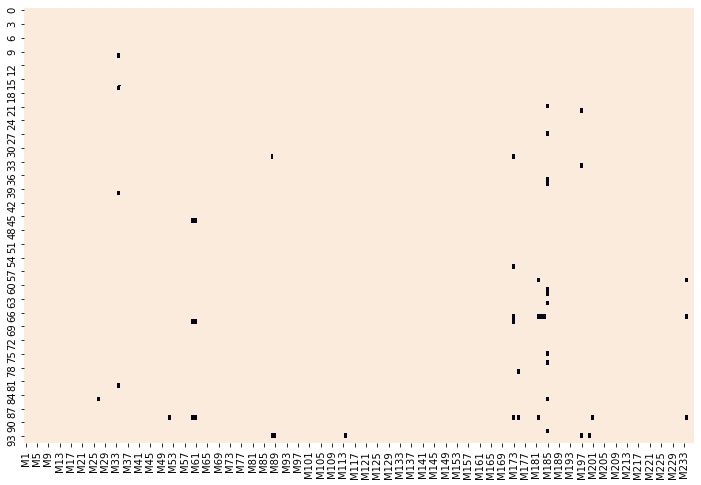

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(X.notna(), cbar=False)
plt.show()

#### __Plot first PCA__ :

In [26]:
cb.plot.pca(X, pcx=1, pcy=2, group_label=peakTable['Class'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
X.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8424708.307,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5293280.501,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.3210,215370.0398,215370.0398
1,8549698.883,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5584632.508,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.1775,207555.0975,207555.0975
2,4629356.620,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2953296.650,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.1880,158135.2760,158135.2760
3,2011695.332,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2200818.420,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.1500,54213.8205,54213.8205
4,6524580.603,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3546574.189,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.7430,157686.6125,157686.6125


In [28]:
X_ = X.copy()
X_[X_.isna()] = 1
X_.isna().sum().sum()

0

In [29]:
cb.plot.pca(X_, pcx=1, pcy=2, group_label=peakTable['Class'])

Loading BokehJS ...

#### feature distribution :

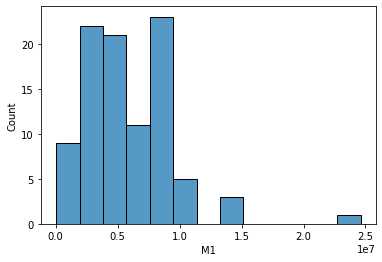

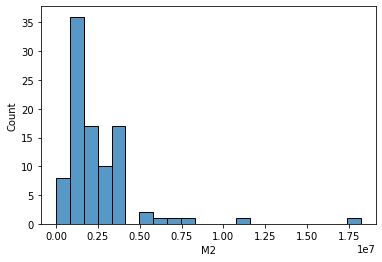

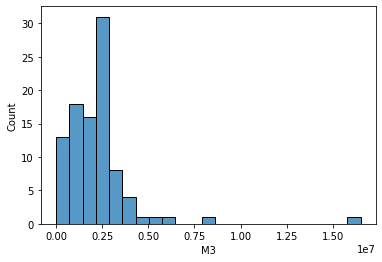

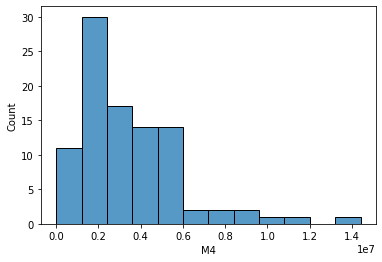

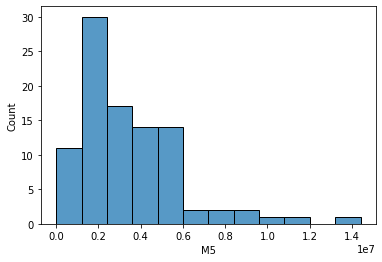

In [30]:
for col in X.columns[0:5]:
    
    plt.figure()
    sns.histplot(X[col])

In [31]:
met_id

,Idx,Name,Label,QC_RSD,Perc_missing,database_identifier,chemical_formula,smiles,inchi,metabolite_identification,taxid,species
0,1,M1,L-Valine,4.119400,0,CHEBI:16414,C5H11NO2,CC(C)[C@H](N)C(O)=O,"InChI=1S/C5H11NO2/c1-3(2)4(6)5(7)8/h3-4H,6H2,1...",L-Valine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
1,2,M2,L-Tyrosine,7.213483,0,CHEBI:17895,C9H11NO3,N[C@@H](Cc1ccc(O)cc1)C(O)=O,InChI=1S/C9H11NO3/c10-8(9(12)13)5-6-1-3-7(11)4...,L-Tyrosine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
2,3,M3,L-Tryptophan,7.825443,0,CHEBI:16828,C11H12N2O2,N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O,InChI=1S/C11H12N2O2/c12-9(11(14)15)5-7-6-13-10...,L-Tryptophan,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
3,4,M4,L-Threonine,9.196762,0,CHEBI:16857,C4H9NO3,C[C@@H](O)[C@H](N)C(O)=O,"InChI=1S/C4H9NO3/c1-2(6)3(5)4(7)8/h2-3,6H,5H2,...",L-Threonine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
4,5,M5,L-Homoserine,9.196762,0,CHEBI:15699,C4H9NO3,N[C@@H](CCO)C(O)=O,"InChI=1S/C4H9NO3/c5-3(1-2-6)4(7)8/h3,6H,1-2,5H...",L-Homoserine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...
231,232,M232,octenoyl-L-carnitine,6.511420,0,CHEBI:85526,C15H27NO4,C[N+](C)(C)C[C@@H](CC([O-])=O)OC([*])=O,NaN,octenoyl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
232,233,M233,nonayl-L-carnitine,16.569282,0,CHEBI:70997,C16H31NO4,CCCCCCCCC(=O)OC(CC([O-])=O)C[N+](C)(C)C,InChI=1S/C16H31NO4/c1-5-6-7-8-9-10-11-16(20)21...,nonayl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
233,234,M234,propionylglycine,18.489419,0,CHEBI:89836,C5H9NO3,C(CNC(=O)CC)(=O)O,"InChI=1S/C5H9NO3/c1-2-4(7)6-3-5(8)9/h2-3H2,1H3...",propionylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
234,235,M235,tiglylglycine,16.673262,0,CHEBI:73018,C7H11NO3,CC=C(/C)C(=O)NCC(O)=O,InChI=1S/C7H11NO3/c1-3-5(2)7(11)8-4-6(9)10/h3H...,tiglylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens


------------------------------------------------------------------------------------------------------------------------


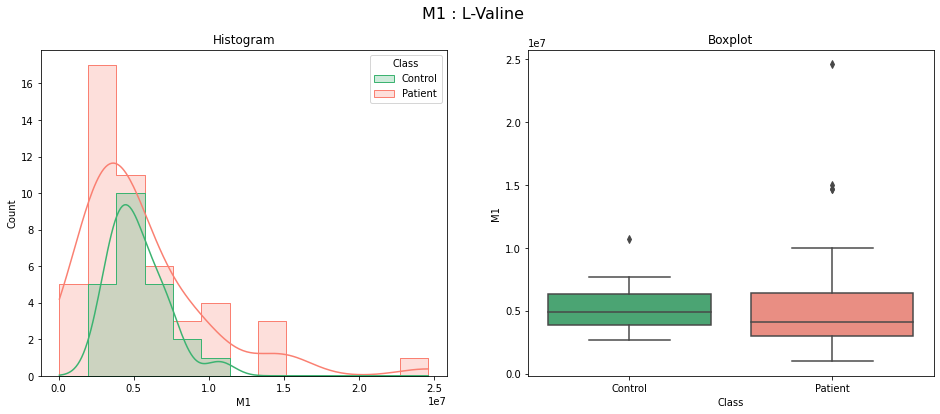

------------------------------------------------------------------------------------------------------------------------


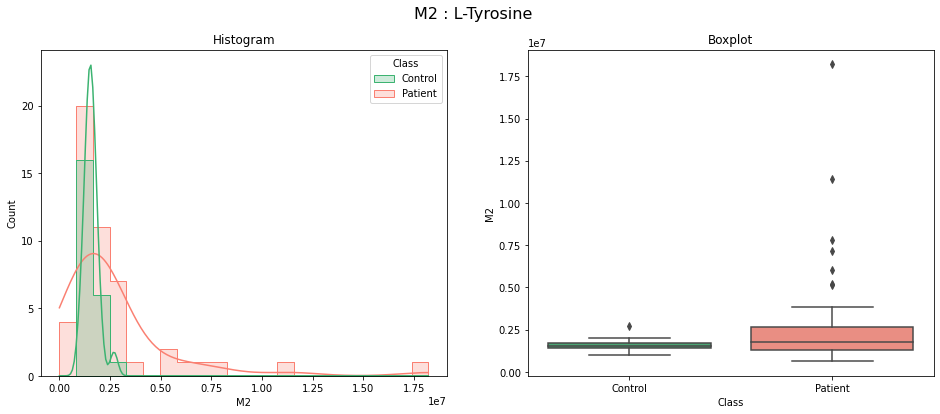

------------------------------------------------------------------------------------------------------------------------


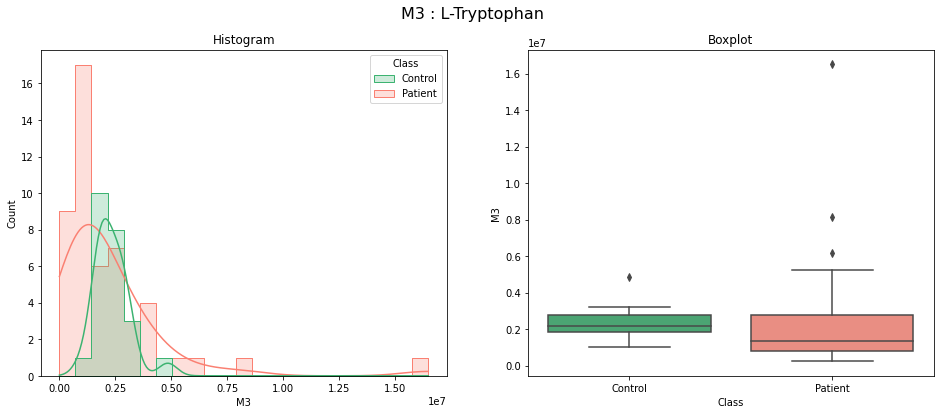

------------------------------------------------------------------------------------------------------------------------


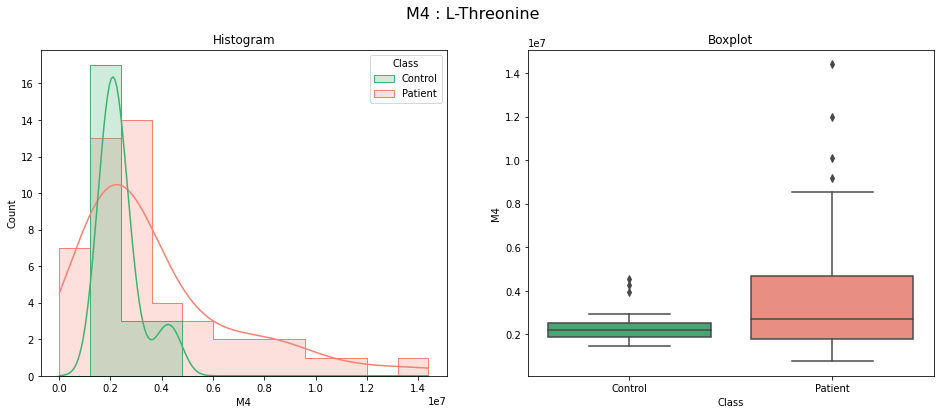

------------------------------------------------------------------------------------------------------------------------


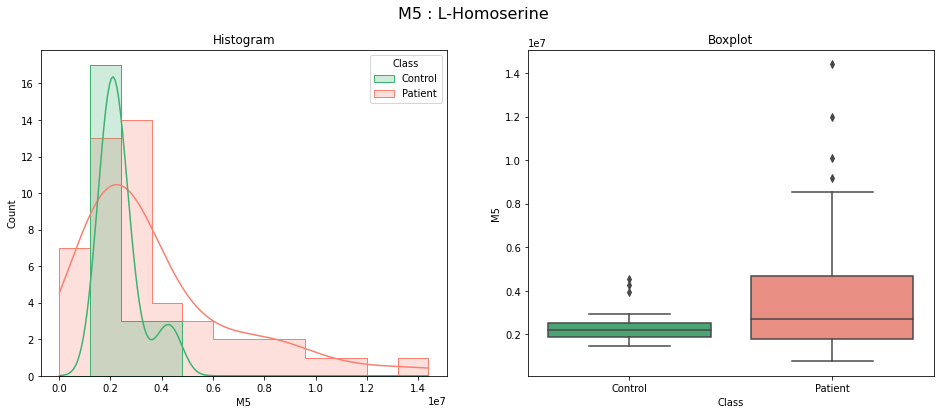

In [32]:
palette = {'Patient': 'salmon', 'Control': 'mediumseagreen'}

for col in [col for col in peakTable.columns if 'M' == col[0]][:5]:
    
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=peakTable, x=peakTable[col], hue='Class', hue_order=['Control', 'Patient'], kde=True, element='step', palette=palette)
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Class', y=col, data=peakTable, order=['Control', 'Patient'], palette=palette)
    plt.title('Boxplot')
    
    plt.suptitle(col + ' : ' + met_id[met_id['Name'] == col]['Label'].values[0], fontsize=16)
    
    print(120 * '-')
    
    plt.show()

#### __feature correlation__ :

<AxesSubplot:>

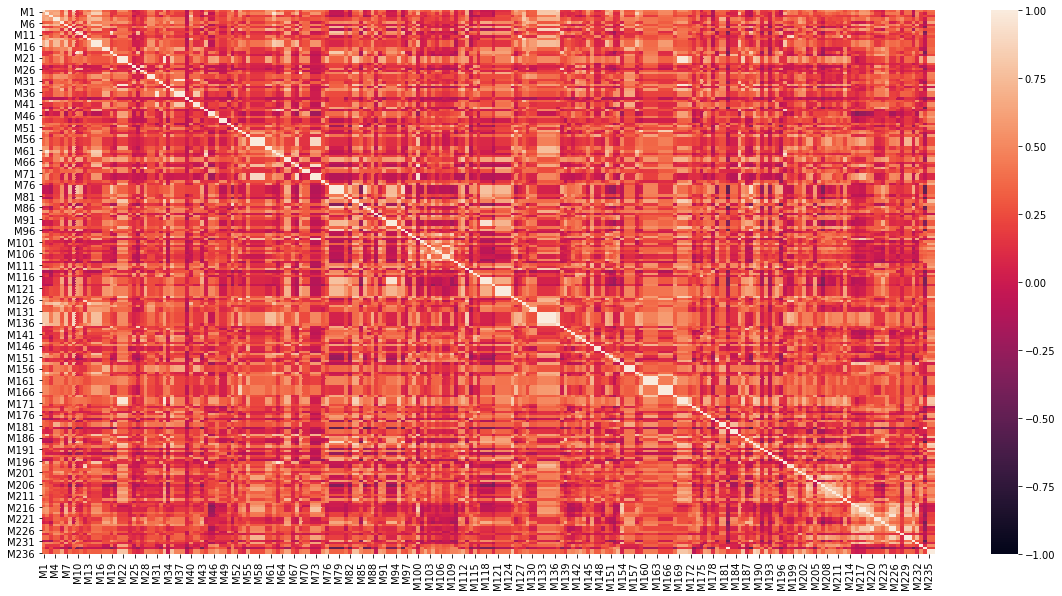

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), vmin=-1, vmax=1)

<AxesSubplot:>

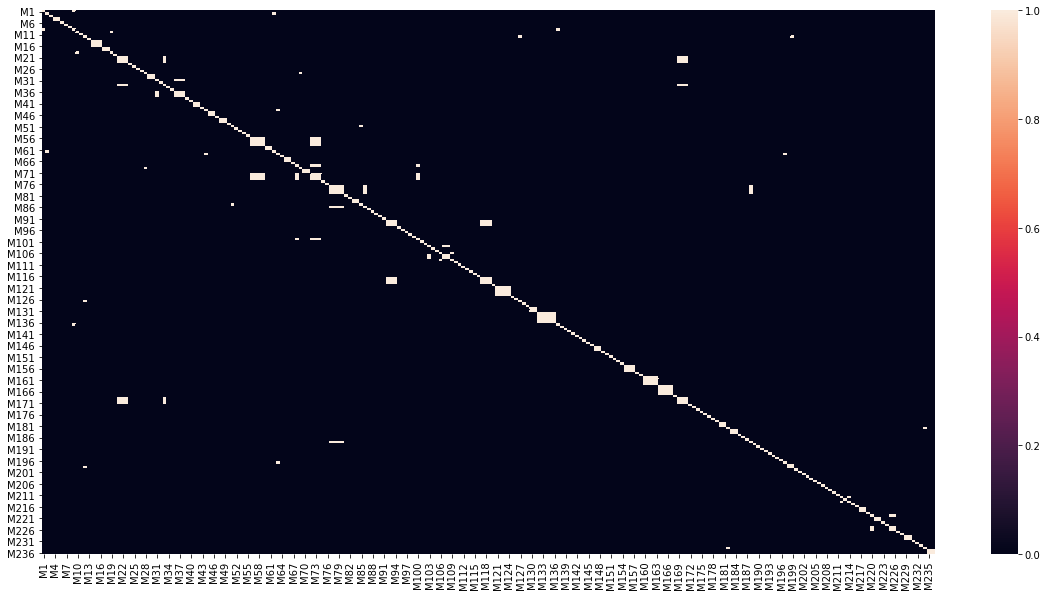

In [34]:
high_corr = (X.corr() > 0.9) | (X.corr() < -0.9)
high_corr

plt.figure(figsize=(20,10))
sns.heatmap(high_corr)

In [35]:
for row in high_corr.index[:10]:
    
    met_corr = [met for met in high_corr.loc[row][high_corr.loc[row]].index.values if met != row]
    
    print(f'Metabolite {row} high correlated with {met_corr}\n')


Metabolite M1 high correlated with ['M9']

Metabolite M2 high correlated with ['M62']

Metabolite M3 high correlated with []

Metabolite M4 high correlated with ['M5']

Metabolite M5 high correlated with ['M4']

Metabolite M6 high correlated with []

Metabolite M7 high correlated with []

Metabolite M8 high correlated with []

Metabolite M9 high correlated with ['M1', 'M137']

Metabolite M10 high correlated with ['M19']



# Statistical analysis

### Separate data based on Class

In [36]:
peakTable_Patient = peakTable[peakTable['Class'] == 'Patient']
peakTable_Patient.head()

,Idx,QC,SampleType,SampleID,Batch,Class,Organism,Organism part,Protocol REF,Sample Name,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
2,3,0,Sample,p1t2,1,Patient,Homo sapiens,urine,Sample collection,p1t2,...,5.221017e+05,279968.788,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.2760,158135.2760
3,4,0,Sample,p3t4,1,Patient,Homo sapiens,urine,Sample collection,p3t4,...,4.295461e+05,145860.142,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.8205,54213.8205
5,6,0,Sample,p4t4,1,Patient,Homo sapiens,urine,Sample collection,p4t4,...,4.002049e+05,286460.263,1.063609e+06,1.063609e+06,2.670000e+07,1822565.618,2744022.754,3095.841558,138124.5025,138124.5025
8,9,0,Sample,p9t2,1,Patient,Homo sapiens,urine,Sample collection,p9t2,...,2.119114e+06,434274.571,1.090397e+06,1.090397e+06,3.024398e+06,2978370.071,7000631.880,51424.995000,149583.1030,149583.1030
9,10,0,Sample,p6t3,1,Patient,Homo sapiens,urine,Sample collection,p6t3,...,2.614339e+05,168765.703,1.055910e+06,1.055910e+06,1.903522e+06,851245.312,2590131.231,5739.910500,142762.3961,142762.3961


In [37]:
X_Patient = peakTable_Patient.iloc[:, [col[0] == 'M' for col in peakTable_Patient.columns]]
X_Patient.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2953296.650,1.630000e+07,862674.1120,7.084191e+05,2675882.948,...,5.221017e+05,279968.788,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.2760,158135.2760
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2200818.420,5.581527e+06,113610.2050,1.612685e+05,3298522.652,...,4.295461e+05,145860.142,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.8205,54213.8205
5,1.856539e+06,1.372969e+06,7.716133e+05,1.768996e+06,1.768996e+06,4669248.858,9.736121e+06,198300.6985,2.876873e+05,4990902.249,...,4.002049e+05,286460.263,1.063609e+06,1.063609e+06,2.670000e+07,1822565.618,2744022.754,3095.841558,138124.5025,138124.5025
8,1.470000e+07,5.126260e+06,3.925277e+06,5.979577e+06,5.979577e+06,4170603.210,3.600000e+07,225587.7265,2.227295e+06,3475147.393,...,2.119114e+06,434274.571,1.090397e+06,1.090397e+06,3.024398e+06,2978370.071,7000631.880,51424.995000,149583.1030,149583.1030
9,4.736876e+06,1.845906e+06,1.086061e+06,1.822684e+06,1.822684e+06,3429637.003,6.875710e+06,735094.0340,4.707077e+05,7581794.507,...,2.614339e+05,168765.703,1.055910e+06,1.055910e+06,1.903522e+06,851245.312,2590131.231,5739.910500,142762.3961,142762.3961


In [38]:
X_Patient.shape

(50, 236)

In [39]:
peakTable_Control = peakTable[peakTable['Class'] == 'Control']
peakTable_Control.head()

,Idx,QC,SampleType,SampleID,Batch,Class,Organism,Organism part,Protocol REF,Sample Name,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
4,5,0,Sample,K1,1,Control,Homo sapiens,urine,Sample collection,K1,...,7.789649e+05,182857.4935,1.399567e+06,1.399567e+06,1386025.034,1238145.996,4866463.710,101284.7430,157686.6125,157686.6125
7,8,0,Sample,K2,1,Control,Homo sapiens,urine,Sample collection,K2,...,9.518609e+05,200035.5390,2.246585e+06,2.246585e+06,1368796.704,975364.114,1091433.833,69463.3030,157202.1480,157202.1480
10,11,0,Sample,K3,1,Control,Homo sapiens,urine,Sample collection,K3,...,1.143310e+06,216472.9435,1.393596e+06,1.393596e+06,1162601.444,2395833.262,1136993.827,33897.8615,121969.9410,121969.9410
15,16,0,Sample,K4,1,Control,Homo sapiens,urine,Sample collection,K4,...,5.301131e+05,128764.0885,7.573913e+05,7.573913e+05,1757716.032,988294.266,4720631.153,37409.1195,97980.4720,97980.4720
19,20,0,Sample,K7,1,Control,Homo sapiens,urine,Sample collection,K7,...,1.270039e+06,239500.3560,2.482318e+06,2.482318e+06,1268211.770,2867596.695,2412932.072,21672.9940,149383.1965,149383.1965


In [40]:
X_Control = peakTable_Control.iloc[:, [col[0] == 'M' for col in peakTable_Control.columns]]
X_Control.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
4,6524580.603,1548619.701,2492898.235,2923178.529,2923178.529,3546574.189,1.010000e+07,62627.84900,452757.2952,6.828452e+05,...,7.789649e+05,182857.4935,1.399567e+06,1.399567e+06,1386025.034,1238145.996,4866463.710,101284.7430,157686.6125,157686.6125
7,4858460.448,1624948.767,2039757.930,2074295.386,2074295.386,3540918.675,2.240000e+07,292201.11300,577823.8085,1.003345e+06,...,9.518609e+05,200035.5390,2.246585e+06,2.246585e+06,1368796.704,975364.114,1091433.833,69463.3030,157202.1480,157202.1480
10,3962408.005,1396481.032,2582077.202,1728062.511,1728062.511,2817155.086,8.891398e+06,48885.63600,387141.1963,3.743086e+05,...,1.143310e+06,216472.9435,1.393596e+06,1.393596e+06,1162601.444,2395833.262,1136993.827,33897.8615,121969.9410,121969.9410
15,5261453.650,1803863.453,2238208.500,2034302.378,2034302.378,2660333.770,7.755898e+06,34607.11206,340609.7910,6.667896e+05,...,5.301131e+05,128764.0885,7.573913e+05,7.573913e+05,1757716.032,988294.266,4720631.153,37409.1195,97980.4720,97980.4720
19,6519240.205,1757752.499,2781645.535,4548045.782,4548045.782,2932799.530,1.610000e+07,292464.64680,464551.0690,2.983523e+06,...,1.270039e+06,239500.3560,2.482318e+06,2.482318e+06,1268211.770,2867596.695,2412932.072,21672.9940,149383.1965,149383.1965


In [41]:
X_Control.shape

(23, 236)

### Transform data

In [42]:
X_Patient_log2 = np.log2(X_Patient)
X_Control_log2 = np.log2(X_Control)

### Apply independant t-test

In [57]:
tstat, pval = scipy.stats.ttest_ind(X_Patient_log2, X_Control_log2, equal_var = False, nan_policy = 'omit')

In [58]:
reject, adjusted_pval = statsmodels.stats.multitest.fdrcorrection(pval, alpha=0.05, method='indep', is_sorted=False)

In [59]:
results = pd.DataFrame({'t-statistic': tstat, 'p-values': pval, 'H0_rejected': reject, 'adjusted_p-values': adjusted_pval},
                       columns=['t-statistic', 'p-values', 'H0_rejected', 'adjusted_p-values'], index=X.columns)
results

,t-statistic,p-values,H0_rejected,adjusted_p-values
M1,-1.056747,2.942261e-01,False,3.579245e-01
M2,2.309340,2.415613e-02,True,3.904690e-02
M3,-2.759924,7.395022e-03,True,1.322140e-02
M4,1.824205,7.237184e-02,False,1.022740e-01
M5,1.824205,7.237184e-02,False,1.022740e-01
...,...,...,...,...
M232,5.939695,1.000137e-07,True,4.621916e-07
M233,0.889871,3.776449e-01,False,4.223896e-01
M234,-9.980403,4.344917e-15,True,7.887695e-14
M235,-1.034641,3.045067e-01,False,3.647898e-01


In [60]:
alpha = 0.05
results[results['p-values'] < alpha]

,t-statistic,p-values,H0_rejected,adjusted_p-values
M2,2.309340,2.415613e-02,True,3.904690e-02
M3,-2.759924,7.395022e-03,True,1.322140e-02
M6,2.736045,7.856877e-03,True,1.394153e-02
M7,3.338593,1.345811e-03,True,2.881759e-03
M8,8.433561,2.048987e-10,True,1.611870e-09
...,...,...,...,...
M227,2.088863,4.031176e-02,False,6.177646e-02
M228,5.053130,4.136034e-06,True,1.337129e-05
M231,10.053114,2.749906e-15,True,5.899798e-14
M232,5.939695,1.000137e-07,True,4.621916e-07


In [61]:
results[results['adjusted_p-values'] < alpha]

,t-statistic,p-values,H0_rejected,adjusted_p-values
M2,2.309340,2.415613e-02,True,3.904690e-02
M3,-2.759924,7.395022e-03,True,1.322140e-02
M6,2.736045,7.856877e-03,True,1.394153e-02
M7,3.338593,1.345811e-03,True,2.881759e-03
M8,8.433561,2.048987e-10,True,1.611870e-09
...,...,...,...,...
M226,4.671420,1.715049e-05,True,5.059393e-05
M228,5.053130,4.136034e-06,True,1.337129e-05
M231,10.053114,2.749906e-15,True,5.899798e-14
M232,5.939695,1.000137e-07,True,4.621916e-07


,t-statistic,p-values,H0_rejected,adjusted_p-values,log2_fold_change,-log10_pval
M1,-1.056747,2.942261e-01,False,3.579245e-01,-0.180289,0.531319
M2,2.309340,2.415613e-02,True,3.904690e-02,0.366765,1.616973
M3,-2.759924,7.395022e-03,True,1.322140e-02,-0.541599,2.131061
M4,1.824205,7.237184e-02,False,1.022740e-01,0.322055,1.140430
M5,1.824205,7.237184e-02,False,1.022740e-01,0.322055,1.140430
...,...,...,...,...,...,...
M232,5.939695,1.000137e-07,True,4.621916e-07,1.352304,6.999941
M233,0.889871,3.776449e-01,False,4.223896e-01,0.206498,0.422916
M234,-9.980403,4.344917e-15,True,7.887695e-14,-2.249002,14.362019
M235,-1.034641,3.045067e-01,False,3.647898e-01,-0.135909,0.516403


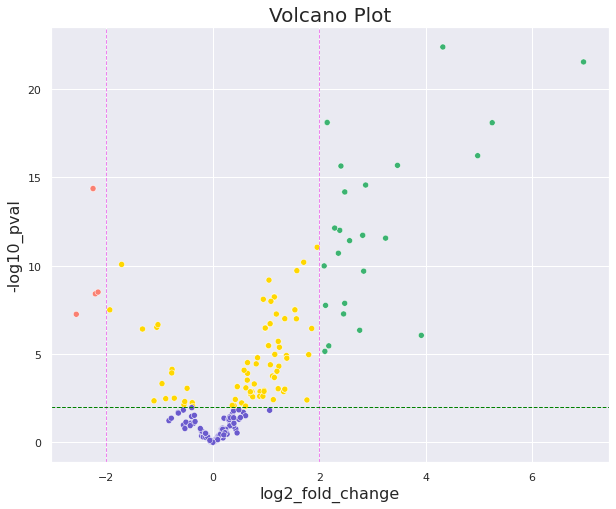

In [62]:
mean_Patient = X_Patient_log2.mean(axis=0)
mean_Control = X_Control_log2.mean(axis=0)

log2_fold_change = mean_Patient - mean_Control

log10_pval = -np.log10(pval)

results_volcano = pd.DataFrame({'t-statistic': tstat, 'p-values': pval, 'H0_rejected': reject, 'adjusted_p-values': adjusted_pval, 'log2_fold_change': log2_fold_change, '-log10_pval': log10_pval},
                       columns=['t-statistic', 'p-values', 'H0_rejected', 'adjusted_p-values', 'log2_fold_change', '-log10_pval'], index=X.columns)
display(results_volcano)





sns.set({'figure.figsize': (10,8)})
sns.set(style = 'darkgrid', font_scale = 1)

pval_col = 'p-values'
pval_threshold = 0.01

log10_pval = '-log10_pval'

log2_fold_change = 'log2_fold_change'
log2_fold_change_threshold = 2


color_col = 'Color'
results_volcano.loc[(results_volcano[log2_fold_change] >= log2_fold_change_threshold) 
              & (results_volcano[pval_col] <= pval_threshold), color_col] = 'mediumseagreen'

results_volcano.loc[(results_volcano[log2_fold_change] <= -log2_fold_change_threshold) 
              & (results_volcano[pval_col] <= pval_threshold), color_col] = 'salmon'

results_volcano.loc[(results_volcano[log2_fold_change] >= -log2_fold_change_threshold)
              & (results_volcano[log2_fold_change] <= log2_fold_change_threshold)
              & (results_volcano[pval_col] <= pval_threshold), color_col] = 'gold'

results_volcano[color_col].fillna('slateblue', inplace = True)

ColorsPalette = {'mediumseagreen' : 'mediumseagreen', 'salmon' : 'salmon', 'gold' : 'gold', 'slateblue' : 'slateblue'}

ax = sns.scatterplot(x = log2_fold_change, y = log10_pval, hue = color_col, data = results_volcano, palette = ColorsPalette, legend = False)

ax.axvline(-log2_fold_change_threshold, color = 'violet', linewidth = 1, linestyle = "dashed")
ax.axvline(log2_fold_change_threshold, color = 'violet', linewidth = 1, linestyle = "dashed")

HLinePos = -np.log10(pval_threshold)
ax.axhline(HLinePos, color = 'green', linewidth = 1, linestyle = 'dashed')


ax.set_title('Volcano Plot', fontsize=20)
ax.set_xlabel('log2_fold_change', fontsize=16)
ax.set_ylabel('-log10_pval', fontsize=16)

plt.show()

In [63]:
results_volcano[results_volcano['Color'] == 'mediumseagreen'].index

Index(['M8', 'M10', 'M19', 'M26', 'M39', 'M43', 'M77', 'M78', 'M79', 'M80',
       'M82', 'M86', 'M87', 'M92', 'M93', 'M94', 'M96', 'M100', 'M114', 'M117',
       'M118', 'M119', 'M120', 'M138', 'M173', 'M178', 'M185', 'M187', 'M188',
       'M223', 'M231'],
      dtype='object')

In [64]:
met_id[met_id['Name'].isin(results_volcano[results_volcano['Color'] == 'mediumseagreen'].index)]

,Idx,Name,Label,QC_RSD,Perc_missing,database_identifier,chemical_formula,smiles,inchi,metabolite_identification,taxid,species
7,8,M8,Pantothenate,31.493101,0,CHEBI:7916,C9H17NO5,CC(C)(CO)C(O)C(=O)NCCC(O)=O,"InChI=1S/C9H17NO5/c1-9(2,5-11)7(14)8(15)10-4-3...",Pantothenate,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
9,10,M10,L-Cystine,3.430797,0,CHEBI:16283,C6H12N2O4S2,N[C@@H](CSSC[C@H](N)C(O)=O)C(O)=O,InChI=1S/C6H12N2O4S2/c7-3(5(9)10)1-13-14-2-4(8...,L-Cystine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
18,19,M19,L-Cysteine,11.947148,0,CHEBI:17561,C3H7NO2S,N[C@@H](CS)C(O)=O,"InChI=1S/C3H7NO2S/c4-2(1-7)3(5)6/h2,7H,1,4H2,(...",L-Cysteine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
25,26,M26,L-Ornithine,17.326309,0,CHEBI:15729,C5H12N2O2,NCCC[C@H](N)C(O)=O,"InChI=1S/C5H12N2O2/c6-3-1-2-4(7)5(8)9/h4H,1-3,...",L-Ornithine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
38,39,M39,N-Acetylserotonin,3.476019,0,CHEBI:17697,C12H14N2O2,C1=CC(=CC=2C(=CNC12)CCNC(C)=O)O,InChI=1S/C12H14N2O2/c1-8(15)13-5-4-9-7-14-12-3...,N-Acetylserotonin,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
42,43,M43,Carnosine,7.716251,0,CHEBI:15727,C9H14N4O3,NCCC(=O)N[C@@H](Cc1c[nH]cn1)C(O)=O,InChI=1S/C9H14N4O3/c10-2-1-8(14)13-7(9(15)16)3...,Carnosine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
76,77,M77,Melibiose,21.595970,0,CHEBI:28053,C12H22O11,OC[C@H]1O[C@H](OC[C@H]2OC(O)[C@H](O)[C@@H](O)[...,InChI=1S/C12H22O11/c13-1-3-5(14)8(17)10(19)12(...,Melibiose,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
77,78,M78,Sucrose,21.595970,0,CHEBI:17992,C12H22O11,OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...,InChI=1S/C12H22O11/c13-1-4-6(16)8(18)9(19)11(2...,Sucrose,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
78,79,M79,Lactose,21.595970,0,CHEBI:17716,C12H22O11,OC[C@H]1O[C@@H](O[C@@H]2[C@@H](CO)OC(O)[C@H](O...,InChI=1S/C12H22O11/c13-1-3-5(15)6(16)9(19)12(2...,Lactose,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
79,80,M80,Maltose,21.595970,0,CHEBI:17306,C12H22O11,OC[C@H]1O[C@H](O[C@@H]2[C@@H](CO)OC(O)[C@H](O)...,InChI=1S/C12H22O11/c13-1-3-5(15)6(16)9(19)12(2...,Maltose,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens


In [65]:
f"{met_id[met_id['Name'].isin(results_volcano[results_volcano['Color'] == 'mediumseagreen'].index)].shape[0]} metaboites with log2_fold_change_threshold > {log2_fold_change_threshold} and pval_threshold > {pval_threshold}"

'31 metaboites with log2_fold_change_threshold > 2 and pval_threshold > 0.01'

# Missing value imputation

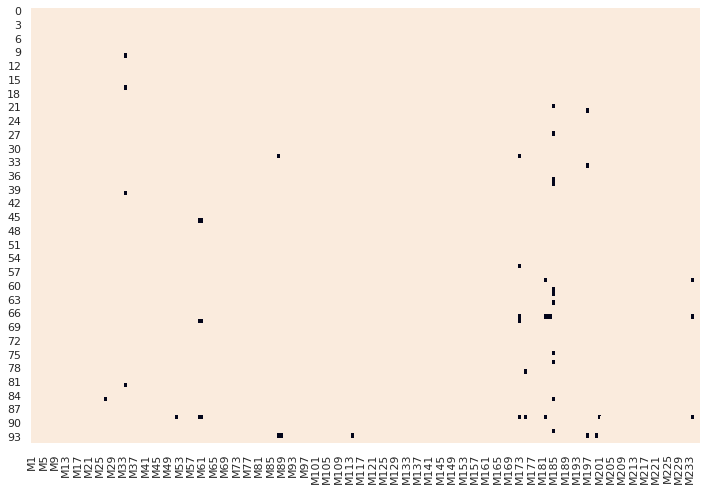

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(X.notna(), cbar=False)
plt.show()

In [67]:
X.isna().sum().sum()

47

#### Path to save imputed peak tables

In [68]:
path_imputed_peak_tables = workdir + 'data/imputed_peak_tables/'
path_imputed_peak_tables

'/home/vincentm/MLnotebooks/Metabolomics_Training/data/imputed_peak_tables/'

## Univariate imputation

In [69]:
import sys
sys.path.append(workdir + 'bin/')

from missing_value_imputation_functions import *

### Constant imputation

In [70]:
'''
imputes missing values in peak table with constant value given as parameters

inputs :
    - X : peakTable with only variable columns, no metadata
    - const (default=0): value to impute in place of NaN
'''
def const_imputer(X, const=0):
    
    X_const = X.copy()
    X_const[X_const.isna()] = const
    return X_const

In [71]:
X_const_1 = const_imputer(X, 1)
X_const_1.to_csv(path_imputed_peak_tables + 'X_const_1.csv', index = False, header=True)
X_const_1

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8.424708e+06,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5.293281e+06,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,8.549699e+06,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5.584633e+06,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2.953297e+06,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2.200818e+06,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,6.524581e+06,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3.546574e+06,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,8.517687e+06,3.418264e+06,2.418852e+06,4.365211e+06,4.365211e+06,5.353033e+06,3.010000e+07,389607.8880,727946.2808,5.817263e+06,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,2.724794e+06,1.205375e+06,1.172044e+06,4.786256e+06,4.786256e+06,4.409136e+06,1.580000e+07,58527.0095,295618.1131,3.781715e+06,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,5.789542e+06,2.679931e+06,3.019433e+06,8.531440e+06,8.531440e+06,1.110000e+07,4.020000e+07,687231.2095,369766.4240,5.046373e+06,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,1.380929e+05,3.050297e+04,6.851811e+03,1.075518e+04,1.075518e+04,4.882751e+04,1.388751e+05,1096.7610,3144.2650,2.043413e+04,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


In [72]:
X_const_1.isna().sum().sum()

0

### Mean imputation

In [73]:
'''
For each feature, the missing values are imputed by the mean value of the non-missing values in that feature

input :
    - X : peakTable with only variable columns, no metadata
'''
def mean_imputer(X):
    
    import pandas as pd
    from sklearn.impute import SimpleImputer
    
    imp = SimpleImputer(strategy='mean')
    imp.fit(X)

    X_mean = pd.DataFrame(imp.transform(X), columns=X.columns)
    return X_mean

In [74]:
X_mean = mean_imputer(X)
X_mean.to_csv(path_imputed_peak_tables + 'X_mean.csv', index = False, header=True)
X_mean

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8.424708e+06,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5.293281e+06,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,8.549699e+06,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5.584633e+06,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2.953297e+06,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2.200818e+06,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,6.524581e+06,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3.546574e+06,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,8.517687e+06,3.418264e+06,2.418852e+06,4.365211e+06,4.365211e+06,5.353033e+06,3.010000e+07,389607.8880,727946.2808,5.817263e+06,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,2.724794e+06,1.205375e+06,1.172044e+06,4.786256e+06,4.786256e+06,4.409136e+06,1.580000e+07,58527.0095,295618.1131,3.781715e+06,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,5.789542e+06,2.679931e+06,3.019433e+06,8.531440e+06,8.531440e+06,1.110000e+07,4.020000e+07,687231.2095,369766.4240,5.046373e+06,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,1.380929e+05,3.050297e+04,6.851811e+03,1.075518e+04,1.075518e+04,4.882751e+04,1.388751e+05,1096.7610,3144.2650,2.043413e+04,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


### Median imputation

In [75]:
'''
For each feature, the missing values are imputed by the median value of the non-missing values in that feature

input :
    - X : peakTable with only variable columns, no metadata
'''
def median_imputer(X):

    import pandas as pd
    from sklearn.impute import SimpleImputer
    
    imp = SimpleImputer(strategy='median')
    imp.fit(X)

    X_median = pd.DataFrame(imp.transform(X), columns=X.columns)
    return X_median

In [76]:
X_median = median_imputer(X)
X_median.to_csv(path_imputed_peak_tables + 'X_median.csv', index = False, header=True)
X_median

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8.424708e+06,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5.293281e+06,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,8.549699e+06,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5.584633e+06,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2.953297e+06,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2.200818e+06,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,6.524581e+06,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3.546574e+06,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,8.517687e+06,3.418264e+06,2.418852e+06,4.365211e+06,4.365211e+06,5.353033e+06,3.010000e+07,389607.8880,727946.2808,5.817263e+06,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,2.724794e+06,1.205375e+06,1.172044e+06,4.786256e+06,4.786256e+06,4.409136e+06,1.580000e+07,58527.0095,295618.1131,3.781715e+06,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,5.789542e+06,2.679931e+06,3.019433e+06,8.531440e+06,8.531440e+06,1.110000e+07,4.020000e+07,687231.2095,369766.4240,5.046373e+06,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,1.380929e+05,3.050297e+04,6.851811e+03,1.075518e+04,1.075518e+04,4.882751e+04,1.388751e+05,1096.7610,3144.2650,2.043413e+04,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


### Mode, minimum, half-minimum, ...

## Multivariate imputation

In [77]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [78]:
'''
For each feature, the missing values are imputed using the MICE method (Multivariate Imputation by Chained Equations), inspired by the R MICE package.

input :
    - X : peakTable with only variable columns, no metadata
'''
def python_MICE_imputer(X, estimator):
    
    import pandas as pd
    
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    
    from sklearn.linear_model import BayesianRidge
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.neighbors import KNeighborsRegressor

    import time
    start_time = time.time()

    imp = IterativeImputer(estimator=estimator, max_iter=20, random_state=0, n_nearest_features=20)
    imp.fit(X)

    X_python_MICE = pd.DataFrame(imp.transform(X), columns=X.columns)
    
    #print("----- {1} : {0:.1f} seconds -----".format(time.time() - start_time, str(estimator).split('(')[0]))
    print(f"----- {str(estimator).split('(')[0]} : {time.time() - start_time:.1f} seconds -----")
          
    return X_python_MICE

In [79]:
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0)
]

In [80]:
for estimator in estimators:
    
    X_python_MICE = python_MICE_imputer(X, estimator)
    
    X_python_MICE.to_csv(path_imputed_peak_tables + 'X_python_MICE_' + str(estimator).split('(')[0] + '.csv', index = False, header=True)

/home/vincentm/.local/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


----- BayesianRidge : 12.3 seconds -----


/home/vincentm/.local/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


----- DecisionTreeRegressor : 4.5 seconds -----
----- ExtraTreesRegressor : 7.2 seconds -----


### KNN imputation

In [81]:
'''
"Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed."

inputs :
    - X : peakTable with only variable columns, no metadata
    - n_neighbors (default=5) : number of neighbors to impute each feature
    - by (default='features') : allows to choose axis along which perform the imputation
'''
def KNN_imputer(X, n_neighbors=10, by='columns'):
    
    import pandas as pd
    from sklearn.impute import KNNImputer
    
    imp = KNNImputer(n_neighbors=n_neighbors, weights="uniform")
    
    if by=='rows':

        imp.fit(X)

        X_imp_KNN = pd.DataFrame(imp.transform(X), columns=X.columns)
        X_imp_KNN.columns = X.columns
        return X_imp_KNN
    
    elif by=='columns':
        
        imp.fit(X.transpose())

        X_imp_KNN = pd.DataFrame(imp.transform(X.transpose()), columns=X.transpose().columns).transpose()
        X_imp_KNN.columns = X.columns
        return X_imp_KNN
    
    else:
        print('Wrong argument for <by>')

In [82]:
X_KNN_features = KNN_imputer(X, by='columns')
X_KNN_features.to_csv(path_imputed_peak_tables + 'X_KNN_features.csv', index=False, header=True)
X_KNN_features

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8.424708e+06,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5.293281e+06,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,8.549699e+06,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5.584633e+06,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2.953297e+06,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2.200818e+06,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,6.524581e+06,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3.546574e+06,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,8.517687e+06,3.418264e+06,2.418852e+06,4.365211e+06,4.365211e+06,5.353033e+06,3.010000e+07,389607.8880,727946.2808,5.817263e+06,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,2.724794e+06,1.205375e+06,1.172044e+06,4.786256e+06,4.786256e+06,4.409136e+06,1.580000e+07,58527.0095,295618.1131,3.781715e+06,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,5.789542e+06,2.679931e+06,3.019433e+06,8.531440e+06,8.531440e+06,1.110000e+07,4.020000e+07,687231.2095,369766.4240,5.046373e+06,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,1.380929e+05,3.050297e+04,6.851811e+03,1.075518e+04,1.075518e+04,4.882751e+04,1.388751e+05,1096.7610,3144.2650,2.043413e+04,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


In [83]:
X_KNN_samples = KNN_imputer(X, by='rows')
X_KNN_samples.to_csv(path_imputed_peak_tables + 'X_KNN_samples.csv', index=False, header=True)
X_KNN_samples

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8.424708e+06,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5.293281e+06,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,8.549699e+06,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5.584633e+06,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2.953297e+06,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2.200818e+06,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,6.524581e+06,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3.546574e+06,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,8.517687e+06,3.418264e+06,2.418852e+06,4.365211e+06,4.365211e+06,5.353033e+06,3.010000e+07,389607.8880,727946.2808,5.817263e+06,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,2.724794e+06,1.205375e+06,1.172044e+06,4.786256e+06,4.786256e+06,4.409136e+06,1.580000e+07,58527.0095,295618.1131,3.781715e+06,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,5.789542e+06,2.679931e+06,3.019433e+06,8.531440e+06,8.531440e+06,1.110000e+07,4.020000e+07,687231.2095,369766.4240,5.046373e+06,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,1.380929e+05,3.050297e+04,6.851811e+03,1.075518e+04,1.075518e+04,4.882751e+04,1.388751e+05,1096.7610,3144.2650,2.043413e+04,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


# Transformation/Normalisation/Scaling

In [84]:
import matplotlib.cm as cm

In [85]:
def boxplot_first_distributions_metabolites_before_after(X_init, X_norm, list_features=None, n=10):
    
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
    fig.suptitle('Before / After')
    
    if list_features == None:
        # list_features = X.columns
        data_init = X_init.iloc[:, :n]
        data_norm = X_norm.iloc[:, :n]
        title = f'Boxplots of {n} first features distributions'
    else:
        data_init = X_init.loc[:, list_features]
        data_norm = X_norm.loc[:, list_features]
        title = f'Boxplots of selected features distributions'
    
    #data_init = X_init.iloc[:, :n]
    #data_norm = X_norm.iloc[:, :n]
    
    bp_init = ax1.boxplot(data_init, patch_artist=True)
    bp_norm = ax2.boxplot(data_norm, patch_artist=True)
    
    ax1.set_xticklabels(data_init.columns[:n], rotation=70)
    ax2.set_xticklabels(data_norm.columns[:n], rotation=70)
    
    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=title,
        xlabel='Features',
        ylabel='Values',
    )
    
    ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax2.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=title,
        xlabel='Features',
        ylabel='Values',
    )
    
    cmap = cm.ScalarMappable(cmap='rainbow')
    
    data_init_mean = data_init.mean()
    data_norm_mean = data_norm.mean()
    
    for patch, color in zip(bp_init['boxes'], cmap.to_rgba(data_init_mean)):
        patch.set_facecolor(color)
    
    for patch, color in zip(bp_norm['boxes'], cmap.to_rgba(data_norm_mean)):
        patch.set_facecolor(color)
    
    
    plt.show()    

## Transformation

<table style="width:20%; font-size:120%">
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>log base e</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{e} x_{ij}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>log base 2</td>
    <td>
        \begin{eqnarray}
           \tilde{x}_{ij} = log_{2} x_{ij}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>log base 10</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = log_{e10} x_{ij}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Square root</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \sqrt{x_{ij}}
        \end{eqnarray}
    </td>
  </tr>
</table>

In [86]:
np.log2(X).head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,23.006195,21.946093,21.384688,22.417132,22.417132,22.335731,24.890411,19.710966,19.609970,22.506311,...,20.811617,20.142547,21.156745,21.156745,23.504458,22.294074,21.721827,15.126919,17.716458,17.716458
1,23.027442,21.936774,21.324430,22.286340,22.286340,22.413031,24.833642,19.742872,19.670565,22.502608,...,20.798334,20.128037,21.207932,21.207932,23.563837,22.401107,21.887700,14.691426,17.663135,17.663135
2,22.142380,21.324578,21.344993,21.387699,21.387699,21.493895,23.958369,19.718456,19.434244,21.351584,...,18.993971,18.094906,19.452247,19.452247,19.864125,21.562164,21.250832,15.047345,17.270800,17.270800
3,20.939980,19.487085,19.415369,19.844258,19.844258,21.069609,22.412228,16.793733,17.299105,21.653389,...,18.712454,17.154226,18.886691,18.886691,22.899545,20.193196,20.649510,11.297575,15.726373,15.726373
4,22.637454,20.562551,21.249393,21.479107,21.479107,21.757995,23.267852,15.934517,18.788378,19.381199,...,19.571199,17.480360,20.416549,20.416549,20.402522,20.239750,22.214442,16.628057,17.266701,17.266701


In [87]:
np.log10(X).head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,6.925555,6.606432,6.437433,6.748229,6.748229,6.723725,7.492760,5.933592,5.903189,6.775075,...,6.264921,6.063511,6.368815,6.368815,7.075547,6.711185,6.538922,4.553656,5.333185,5.333185
1,6.931951,6.603627,6.419293,6.708857,6.708857,6.746995,7.475671,5.943197,5.921430,6.773960,...,6.260922,6.059143,6.384224,6.384224,7.093422,6.743405,6.588854,4.422560,5.317133,5.317133
2,6.665521,6.419338,6.425483,6.438339,6.438339,6.470307,7.212188,5.935847,5.850290,6.427467,...,5.717755,5.447110,5.855710,5.855710,5.979697,6.490858,6.397138,4.529702,5.199029,5.199029
3,6.303562,5.866197,5.844609,5.973717,5.973717,6.342584,6.746753,5.055417,5.207550,6.518319,...,5.633010,5.163937,5.685460,5.685460,6.893450,6.078758,6.216122,3.400909,4.734110,4.734110
4,6.814553,6.189945,6.396705,6.465855,6.465855,6.549809,7.004321,4.796767,5.655865,5.834322,...,5.891518,5.262113,6.145994,6.145994,6.141771,6.092772,6.687213,5.005544,5.197795,5.197795


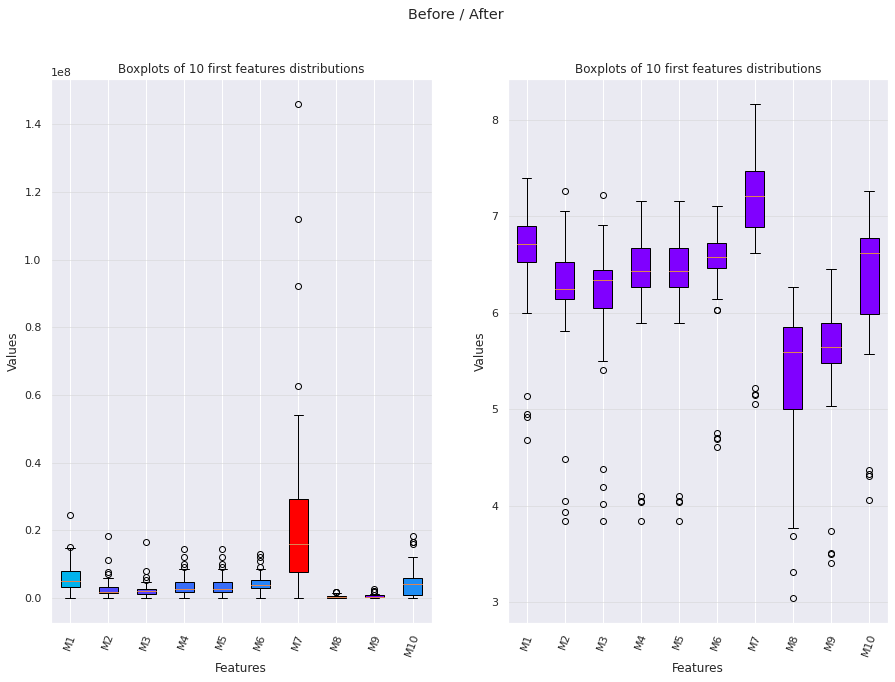

In [88]:
boxplot_first_distributions_metabolites_before_after(X, np.log10(X))

## Normalisation

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

<table style="width:30%; font-size:120%">
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Mean normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - \bar{x}_i
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Median normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L1 normalisation</td>
    <td>
        \begin{eqnarray}
             \sum_{k=1}^p x_{nk} = 1
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L2 normalisation</td>
    <td>
        \begin{eqnarray}
            \sqrt{\sum_{k=1}^p x_{nk} ^2} = 1
        \end{eqnarray}
    </td>
  </tr>
</table>

In [89]:
def mean_normalisation(X):
    
    row_means = np.mean(X, axis=1)
    row_means = np.array(row_means).reshape((row_means.shape[0], 1))
    return X - row_means

In [90]:
mean_normalisation(X)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,1.297249e+06,-3.086986e+06,-4.389465e+06,-1.526928e+06,-1.526928e+06,-1.834179e+06,2.397254e+07,-6.269253e+06,-6.327277e+06,-1.169813e+06,...,-5.287023e+06,-5.969987e+06,-4.789619e+06,-4.789619e+06,4.772540e+06,-1.984834e+06,-3.668691e+06,-7.091678e+06,-6.912090e+06,-6.912090e+06
1,1.375112e+06,-3.160127e+06,-4.548596e+06,-2.059455e+06,-2.059455e+06,-1.589955e+06,2.272541e+07,-6.297189e+06,-6.340080e+06,-1.232213e+06,...,-5.351017e+06,-6.028697e+06,-4.752311e+06,-4.752311e+06,5.225413e+06,-1.635920e+06,-3.294386e+06,-7.148129e+06,-6.967032e+06,-6.967032e+06
2,7.561629e+05,-1.246933e+06,-1.209507e+06,-1.129479e+06,-1.129479e+06,-9.198970e+05,1.242681e+07,-3.010520e+06,-3.164775e+06,-1.197311e+06,...,-3.351092e+06,-3.593225e+06,-3.155879e+06,-3.155879e+06,-2.918866e+06,-7.767863e+05,-1.377807e+06,-3.839332e+06,-3.715058e+06,-3.715058e+06
3,1.329361e+05,-1.143912e+06,-1.179548e+06,-9.374837e+05,-9.374837e+05,3.220592e+05,3.702768e+06,-1.765149e+06,-1.717491e+06,1.419763e+06,...,-1.449213e+06,-1.732899e+06,-1.394073e+06,-1.394073e+06,5.945621e+06,-6.799293e+05,-2.339257e+05,-1.876242e+06,-1.824545e+06,-1.824545e+06
4,3.652963e+06,-1.322998e+06,-3.787192e+05,5.156110e+04,5.156110e+04,6.749568e+05,7.228383e+06,-2.808990e+06,-2.418860e+06,-2.188772e+06,...,-2.092653e+06,-2.688760e+06,-1.472051e+06,-1.472051e+06,-1.485592e+06,-1.633471e+06,1.994846e+06,-2.770333e+06,-2.713931e+06,-2.713931e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2.737978e+06,-2.361446e+06,-3.360857e+06,-1.414498e+06,-1.414498e+06,-4.266766e+05,2.432029e+07,-5.390102e+06,-5.051763e+06,3.755381e+04,...,-4.536557e+06,-4.856369e+06,-3.673957e+06,-3.673957e+06,6.720290e+06,-1.242401e+06,-7.140540e+05,-5.754593e+06,-5.624315e+06,-5.624315e+06
91,-1.093406e+04,-1.530354e+06,-1.563685e+06,2.050528e+06,2.050528e+06,1.673407e+06,1.306427e+07,-2.677201e+06,-2.440110e+06,1.045986e+06,...,-1.474198e+06,-1.552918e+06,-1.453147e+06,-1.453147e+06,1.106427e+07,3.860715e+06,-9.046425e+05,-2.727770e+06,-2.690778e+06,-2.690778e+06
92,-1.384623e+06,-4.494233e+06,-4.154732e+06,1.357275e+06,1.357275e+06,3.925835e+06,3.302584e+07,-6.486934e+06,-6.804398e+06,-2.127791e+06,...,-6.625156e+06,-7.017844e+06,-5.886339e+06,-5.886339e+06,1.882584e+07,-3.751065e+06,-5.833373e+06,-7.168843e+06,-7.029128e+06,-7.029128e+06
93,7.359130e+04,-3.399866e+04,-5.764982e+04,-5.374645e+04,-5.374645e+04,-1.567412e+04,7.437344e+04,-6.340487e+04,-6.135737e+04,-4.406751e+04,...,2.451778e+04,4.576928e+04,-1.486155e+04,-1.486155e+04,-5.033408e+04,-4.413313e+04,-4.426222e+04,-6.414544e+04,-6.331150e+04,-6.331150e+04


In [91]:
mean_normalisation(X).mean(axis=1)

0     5.603721e-10
1     3.985745e-10
2    -7.261159e-10
3     9.471077e-11
4    -2.288844e-10
          ...     
90   -1.894215e-10
91   -4.104133e-10
92   -6.975012e-10
93   -1.007925e-12
94   -7.261159e-10
Length: 95, dtype: float64

In [93]:
from sklearn.preprocessing import Normalizer

In [94]:
def l2_normalisation(X):
    
    return pd.DataFrame(Normalizer(norm='l2').fit_transform(X), columns=X.columns)

In [95]:
l2_normalisation(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [96]:
l2_normalisation(X_KNN_features)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,0.032091,0.015391,0.010430,0.021333,0.021333,0.020163,0.118466,0.003269,0.003048,0.022694,...,0.007011,0.004409,0.008905,0.008905,0.045329,0.019589,0.013175,0.000136,0.000820,0.000820
1,0.032695,0.015352,0.010042,0.019561,0.019561,0.021356,0.114341,0.003355,0.003191,0.022724,...,0.006974,0.004382,0.009263,0.009263,0.047419,0.021181,0.014838,0.000101,0.000794,0.000794
2,0.026026,0.014765,0.014975,0.015425,0.015425,0.016603,0.091638,0.004850,0.003983,0.015044,...,0.002935,0.001574,0.004033,0.004033,0.005365,0.017408,0.014029,0.000190,0.000889,0.000889
3,0.022200,0.008109,0.007716,0.010387,0.010387,0.024287,0.061594,0.001254,0.001780,0.036400,...,0.004740,0.001610,0.005349,0.005349,0.086344,0.013229,0.018151,0.000028,0.000598,0.000598
4,0.057890,0.013740,0.022119,0.025936,0.025936,0.031468,0.089614,0.000556,0.004017,0.006059,...,0.006911,0.001622,0.012418,0.012418,0.012298,0.010986,0.043178,0.000899,0.001399,0.001399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.039516,0.015858,0.011222,0.020251,0.020251,0.024834,0.139641,0.001807,0.003377,0.026988,...,0.005767,0.004284,0.009769,0.009769,0.057991,0.021050,0.023501,0.000117,0.000721,0.000721
91,0.021486,0.009505,0.009242,0.037741,0.037741,0.034768,0.124589,0.000462,0.002331,0.029820,...,0.009948,0.009327,0.010114,0.010114,0.108818,0.052015,0.014439,0.000063,0.000354,0.000354
92,0.014737,0.006822,0.007686,0.021716,0.021716,0.028254,0.102326,0.001749,0.000941,0.012845,...,0.001397,0.000398,0.003278,0.003278,0.066181,0.008713,0.003413,0.000014,0.000369,0.000369
93,0.040301,0.008902,0.002000,0.003139,0.003139,0.014250,0.040530,0.000320,0.000918,0.005964,...,0.025980,0.032182,0.014487,0.014487,0.004135,0.005944,0.005907,0.000104,0.000347,0.000347


In [97]:
np.sqrt((l2_normalisation(X_KNN_features) ** 2).sum(axis=1))

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
90    1.0
91    1.0
92    1.0
93    1.0
94    1.0
Length: 95, dtype: float64

## Scaling

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

<table style="width:30%; font-size:120%">
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Range scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Min-max scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Maximum absolute scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Level scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Robust scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Autoscaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Pareto scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Vast scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
</table>

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
def autoscaling(X):
    
    return pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [101]:
autoscaling(X)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,0.740420,0.652657,0.245375,0.840658,0.840658,0.518885,0.435752,0.961679,0.555505,0.377303,...,0.836413,0.115698,0.595585,0.595585,0.196570,0.227522,0.320510,0.787198,1.740835,1.740835
1,0.774832,0.641579,0.188553,0.646895,0.646895,0.646446,0.380247,1.008121,0.633957,0.373338,...,0.816059,0.111595,0.667372,0.667372,0.244961,0.308299,0.563582,0.271206,1.599610,1.599610
2,-0.304473,0.050420,0.207676,-0.299733,-0.299733,-0.505621,-0.248821,0.972489,0.345767,-0.474724,...,-0.754438,-0.195143,-0.782190,-0.782190,-0.862771,-0.189825,-0.235147,0.680928,0.706532,0.706532
3,-1.025139,-0.755030,-0.788944,-1.019235,-1.019235,-0.835075,-0.744603,-0.840195,-0.904813,-0.313071,...,-0.866126,-0.242649,-0.979972,-0.979972,-0.197876,-0.576856,-0.725726,-1.053819,-1.171457,-1.171457
4,0.217299,-0.408488,0.121032,-0.228095,-0.228095,-0.245868,-0.535601,-0.963568,-0.238579,-0.992166,...,-0.444478,-0.229543,-0.202138,-0.202138,-0.820991,-0.568837,1.132435,4.412509,0.698424,0.698424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.766018,0.387691,0.083467,0.347540,0.347540,0.545046,0.389498,-0.172299,0.390399,0.340856,...,0.115663,0.032760,0.398263,0.398263,0.254639,0.104061,1.247325,0.196948,0.657006,0.657006
91,-0.828816,-0.554658,-0.549066,0.515613,0.515613,0.131783,-0.271948,-0.973492,-0.597740,-0.187623,...,0.137839,0.124673,-0.301599,-0.301599,0.380455,0.524043,-0.618300,-0.752650,-1.338860,-1.338860
92,0.014936,0.073276,0.388154,2.010625,2.010625,3.061217,0.856672,0.547929,-0.428265,0.140714,...,-0.721969,-0.238943,-0.297140,-0.297140,1.561192,-0.123193,-0.901091,-0.898594,0.469824,0.469824
93,-1.540958,-1.054972,-1.140193,-1.390683,-1.390683,-1.777272,-0.996352,-1.112469,-1.266225,-1.164144,...,-1.277044,-0.255256,-1.349849,-1.349849,-0.953762,-0.817215,-1.662754,-1.173419,-2.129661,-2.129661


In [102]:
autoscaling(X).mean(axis=0)

M1     -2.465864e-16
M2     -1.694551e-17
M3      2.296409e-16
M4      1.040104e-16
M5      1.040104e-16
            ...     
M232    9.173948e-17
M233   -2.454177e-16
M234   -9.473099e-17
M235    4.294810e-16
M236    4.294810e-16
Length: 236, dtype: float64

In [103]:
autoscaling(X).std(axis=0)

M1      1.005305
M2      1.005305
M3      1.005305
M4      1.005305
M5      1.005305
          ...   
M232    1.005305
M233    1.005305
M234    1.005479
M235    1.005305
M236    1.005305
Length: 236, dtype: float64

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
def minmax_scaling(X):
    
    return pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

In [106]:
minmax_scaling(X)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,0.341173,0.221705,0.165593,0.388633,0.388633,0.408470,0.212409,0.466838,0.282238,0.326924,...,0.428470,0.039147,0.279483,0.279483,0.248731,0.168151,0.492653,0.352097,0.810241,0.810241
1,0.346264,0.220275,0.158802,0.354909,0.354909,0.431127,0.204184,0.477291,0.294383,0.326084,...,0.424408,0.038723,0.289699,0.289699,0.259195,0.181143,0.553020,0.259880,0.780739,0.780739
2,0.186586,0.143971,0.161087,0.190148,0.190148,0.226503,0.110962,0.469271,0.249770,0.146495,...,0.110948,0.007018,0.083425,0.083425,0.019674,0.101025,0.354655,0.333104,0.594178,0.594178
3,0.079967,0.040008,0.041979,0.064919,0.064919,0.167987,0.037491,0.061282,0.056174,0.180727,...,0.088656,0.002108,0.055280,0.055280,0.163442,0.038775,0.232819,0.023076,0.201873,0.201873
4,0.263779,0.084737,0.150732,0.202617,0.202617,0.272639,0.068463,0.033514,0.159310,0.036919,...,0.172814,0.003462,0.165967,0.165967,0.028708,0.040064,0.694295,1.000000,0.592485,0.592485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.344960,0.187505,0.146243,0.302806,0.302806,0.413117,0.205555,0.211608,0.256679,0.319206,...,0.284614,0.030575,0.251404,0.251404,0.261287,0.148293,0.722828,0.246609,0.583833,0.583833
91,0.109012,0.065871,0.070647,0.332059,0.332059,0.339715,0.107534,0.031280,0.103710,0.207293,...,0.289040,0.040075,0.151813,0.151813,0.288492,0.215843,0.259499,0.076900,0.166903,0.166903
92,0.233841,0.146921,0.182657,0.592266,0.592266,0.860025,0.274786,0.373714,0.129946,0.276823,...,0.117429,0.002491,0.152448,0.152448,0.543798,0.111742,0.189267,0.050818,0.544731,0.544731
93,0.003655,0.001292,0.000000,0.000269,0.000269,0.000640,0.000184,0.000000,0.000226,0.000500,...,0.006640,0.000805,0.002647,0.002647,0.000000,0.000115,0.000107,0.001702,0.001708,0.001708


In [107]:
minmax_scaling(X).min(axis=0)

M1      0.0
M2      0.0
M3      0.0
M4      0.0
M5      0.0
       ... 
M232    0.0
M233    0.0
M234    0.0
M235    0.0
M236    0.0
Length: 236, dtype: float64

In [108]:
minmax_scaling(X).max(axis=0)

M1      1.0
M2      1.0
M3      1.0
M4      1.0
M5      1.0
       ... 
M232    1.0
M233    1.0
M234    1.0
M235    1.0
M236    1.0
Length: 236, dtype: float64

# Apply one missing imputation method + normalisation + scaling for further analysis

In [109]:
X

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,8.424708e+06,4.040474e+06,2.737994e+06,5.600532e+06,5.600532e+06,5.293281e+06,3.110000e+07,858207.1148,800182.9995,5.957647e+06,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.190000e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
1,8.549699e+06,4.014460e+06,2.625991e+06,5.115132e+06,5.115132e+06,5.584633e+06,2.990000e+07,877398.3380,834507.2915,5.942374e+06,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.240000e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
2,4.629357e+06,2.626260e+06,2.663686e+06,2.743715e+06,2.743715e+06,2.953297e+06,1.630000e+07,862674.1120,708419.1145,2.675883e+06,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
3,2.011695e+06,7.348474e+05,6.992114e+05,9.412755e+05,9.412755e+05,2.200818e+06,5.581527e+06,113610.2050,161268.4905,3.298523e+06,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
4,6.524581e+06,1.548620e+06,2.492898e+06,2.923179e+06,2.923179e+06,3.546574e+06,1.010000e+07,62627.8490,452757.2952,6.828452e+05,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,8.517687e+06,3.418264e+06,2.418852e+06,4.365211e+06,4.365211e+06,5.353033e+06,3.010000e+07,389607.8880,727946.2808,5.817263e+06,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.250000e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
91,2.724794e+06,1.205375e+06,1.172044e+06,4.786256e+06,4.786256e+06,4.409136e+06,1.580000e+07,58527.0095,295618.1131,3.781715e+06,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.380000e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
92,5.789542e+06,2.679931e+06,3.019433e+06,8.531440e+06,8.531440e+06,1.110000e+07,4.020000e+07,687231.2095,369766.4240,5.046373e+06,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.600000e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
93,1.380929e+05,3.050297e+04,6.851811e+03,1.075518e+04,1.075518e+04,4.882751e+04,1.388751e+05,1096.7610,3144.2650,2.043413e+04,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


In [110]:
X_KNN = KNN_imputer(X, by='columns')
X_KNN_l2 = l2_normalisation(X_KNN)
X_KNN_l2_auto = autoscaling(X_KNN_l2)
X_KNN_l2_auto

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,0.053969,0.500542,-0.198235,0.388099,0.388099,-0.185477,0.245450,0.734885,0.114262,0.093312,...,-0.001326,-0.017650,0.008715,0.008715,-0.029075,0.063052,-0.299970,-0.054232,0.605291,0.605291
1,0.085880,0.494506,-0.246321,0.207727,0.207727,-0.043763,0.183228,0.788834,0.206165,0.095293,...,-0.006676,-0.020364,0.080066,0.080066,0.020068,0.158047,-0.123955,-0.269610,0.511674,0.511674
2,-0.266549,0.403920,0.365965,-0.213129,-0.213129,-0.608247,-0.159283,1.724159,0.714049,-0.402009,...,-0.590514,-0.302581,-0.962900,-0.962900,-0.968831,-0.067163,-0.209609,0.277368,0.846272,0.846272
3,-0.468757,-0.623051,-0.535037,-0.725765,-0.725765,0.304258,-0.612541,-0.526291,-0.699691,0.980764,...,-0.329567,-0.298999,-0.700494,-0.700494,0.935395,-0.316595,0.226624,-0.719779,-0.174455,-0.174455
4,1.417327,0.245852,1.252609,0.856476,0.856476,1.157075,-0.189823,-0.963120,0.736155,-0.983767,...,-0.015652,-0.297711,0.709145,0.709145,-0.805813,-0.450540,2.875094,4.621310,2.636855,2.636855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.446313,0.572642,-0.099917,0.277978,0.277978,0.369262,0.564914,-0.179753,0.325436,0.371332,...,-0.181072,-0.030255,0.180968,0.180968,0.268655,0.150235,0.792738,-0.175518,0.256101,0.256101
91,-0.506471,-0.407711,-0.345632,2.057732,2.057732,1.549012,0.337824,-1.022049,-0.345843,0.554727,...,0.423297,0.476608,0.249666,0.249666,1.463861,1.998731,-0.166242,-0.505247,-1.030369,-1.030369
92,-0.863135,-0.821754,-0.538798,0.427030,0.427030,0.775442,0.001955,-0.216173,-1.237731,-0.544362,...,-0.812838,-0.420779,-1.113384,-1.113384,0.461247,-0.586192,-1.333045,-0.807059,-0.978663,-0.978663
93,0.487833,-0.500720,-1.244550,-1.463352,-1.463352,-0.887745,-0.930325,-1.110551,-1.252862,-0.989925,...,2.741112,2.773581,1.121757,1.121757,-0.997766,-0.751477,-1.069137,-0.252615,-1.055361,-1.055361


In [114]:
peakTable_preprocessed = pd.concat([metadata, X_KNN_l2_auto], axis=1)
peakTable_preprocessed

,Idx,QC,SampleType,SampleID,Batch,Class,Organism,Organism part,Protocol REF,Sample Name,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
0,1,1,QC,QC9,1,QC,Homo sapiens,urine,Sample collection,QC9,...,-0.001326,-0.017650,0.008715,0.008715,-0.029075,0.063052,-0.299970,-0.054232,0.605291,0.605291
1,2,1,QC,QC10,1,QC,Homo sapiens,urine,Sample collection,QC10,...,-0.006676,-0.020364,0.080066,0.080066,0.020068,0.158047,-0.123955,-0.269610,0.511674,0.511674
2,3,0,Sample,p1t2,1,Patient,Homo sapiens,urine,Sample collection,p1t2,...,-0.590514,-0.302581,-0.962900,-0.962900,-0.968831,-0.067163,-0.209609,0.277368,0.846272,0.846272
3,4,0,Sample,p3t4,1,Patient,Homo sapiens,urine,Sample collection,p3t4,...,-0.329567,-0.298999,-0.700494,-0.700494,0.935395,-0.316595,0.226624,-0.719779,-0.174455,-0.174455
4,5,0,Sample,K1,1,Control,Homo sapiens,urine,Sample collection,K1,...,-0.015652,-0.297711,0.709145,0.709145,-0.805813,-0.450540,2.875094,4.621310,2.636855,2.636855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,1,QC,QC25,1,QC,Homo sapiens,urine,Sample collection,QC25,...,-0.181072,-0.030255,0.180968,0.180968,0.268655,0.150235,0.792738,-0.175518,0.256101,0.256101
91,92,0,Sample,p4t6,1,Patient,Homo sapiens,urine,Sample collection,p4t6,...,0.423297,0.476608,0.249666,0.249666,1.463861,1.998731,-0.166242,-0.505247,-1.030369,-1.030369
92,93,0,Sample,p5t5,1,Patient,Homo sapiens,urine,Sample collection,p5t5,...,-0.812838,-0.420779,-1.113384,-1.113384,0.461247,-0.586192,-1.333045,-0.807059,-0.978663,-0.978663
93,94,0,Blank,Blank4,1,Blank,blank,blank,Sample collection,Blank4,...,2.741112,2.773581,1.121757,1.121757,-0.997766,-0.751477,-1.069137,-0.252615,-1.055361,-1.055361


# Dimensionality reduction - Feature selection/extraction

## Feature selection

https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [125]:
peakTable_preprocessed['Class'].value_counts()

Patient    50
Control    23
QC         18
Blank       4
Name: Class, dtype: int64

In [228]:
X = peakTable_preprocessed.loc[peakTable_preprocessed['Class'].isin(['Patient', 'Control'])]

y = X['Class']
code = {'Control':0, 'Patient':1}
y = y.map(code)

X = X.iloc[:, [col[0] == 'M' for col in X.columns]]

print(X.shape)
print(y.shape)

(73, 236)
(73,)


### Find feature importance

In [229]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

Feature: 0, Score: -0.00465
Feature: 1, Score: 0.02659
Feature: 2, Score: -0.02359
Feature: 3, Score: -0.00687
Feature: 4, Score: -0.00682
Feature: 5, Score: 0.01007
Feature: 6, Score: -0.00570
Feature: 7, Score: -0.00684
Feature: 8, Score: -0.02315
Feature: 9, Score: 0.00601
Feature: 10, Score: 0.03213


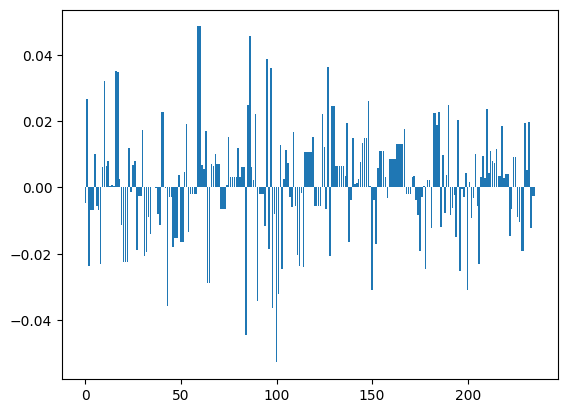

In [230]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if i==10:
        break

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.12050
Feature: 1, Score: 0.04260
Feature: 2, Score: -0.14315
Feature: 3, Score: -0.10228
Feature: 4, Score: -0.10228
Feature: 5, Score: 0.02782
Feature: 6, Score: 0.00243
Feature: 7, Score: 0.17761
Feature: 8, Score: -0.05875
Feature: 9, Score: 0.04840
Feature: 10, Score: 0.11089


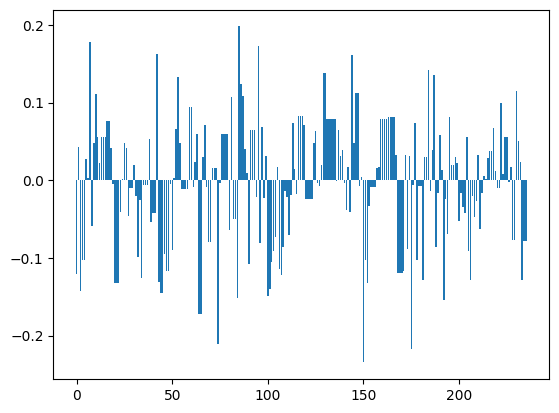

In [231]:
# logistic regression feature importance
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if i==10:
        break

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Select most important features

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.00


In [234]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

Accuracy: 88.00
['M51', 'M86', 'M91', 'M153', 'M179', 'M182', 'M191', 'M207', 'M223', 'M234']


<BarContainer object of 10 artists>

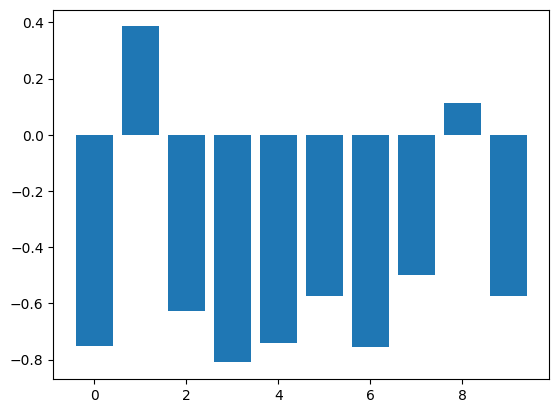

In [244]:
fs = SelectFromModel(RandomForestClassifier(n_estimators=200), max_features=10)

fs.fit(X_train, y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

yhat = model.predict(X_test_fs)

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

feature_idx = fs.get_support()
feature_name = X_train.columns[feature_idx]
print(feature_name.tolist())

importance = model.coef_[0]
plt.bar([x for x in range(len(importance))], importance)

In [245]:
met_id.loc[met_id['Name'].isin(feature_name), ['Name', 'Label']]

,Name,Label
50,M51,N-Methylhistamine
85,M86,D-Gluconate
90,M91,D-Glucosamine
152,M153,cis-Aconitate
178,M179,2-Hydroxyglutarate
181,M182,hexanoylglycine
190,M191,Indoxylsulfate
206,M207,dodecenoyl-L-carnitine
222,M223,valeryl-L-carnitine
233,M234,propionylglycine


------------------------------------------------------------------------------------------------------------------------


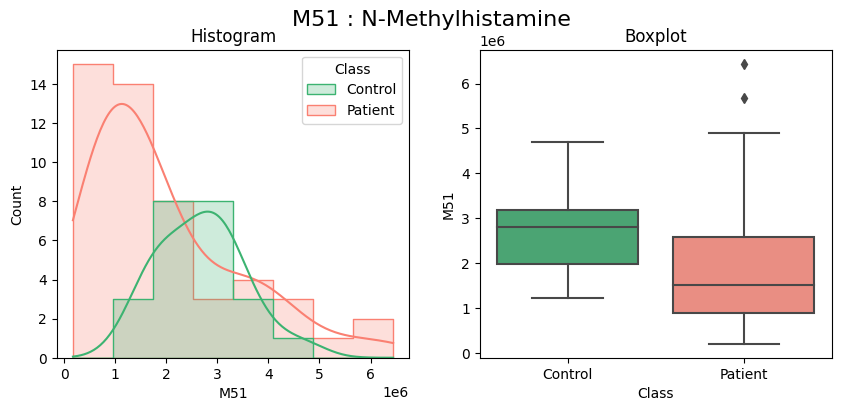

------------------------------------------------------------------------------------------------------------------------


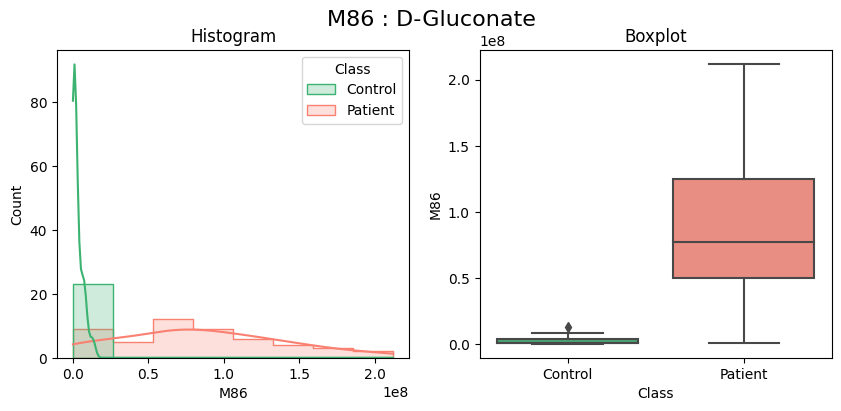

------------------------------------------------------------------------------------------------------------------------


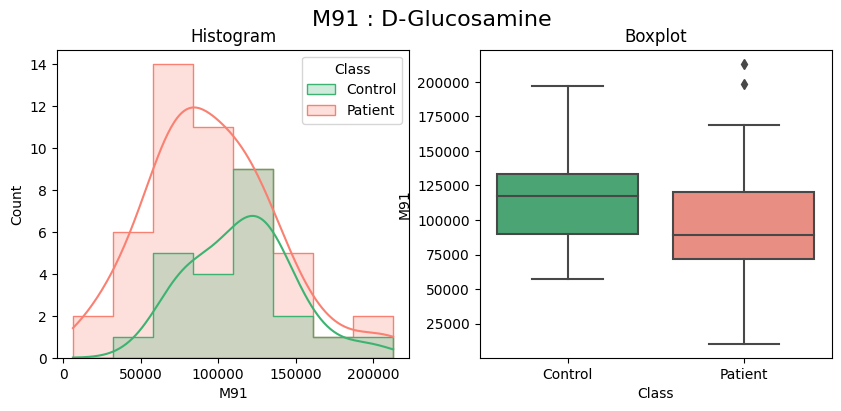

------------------------------------------------------------------------------------------------------------------------


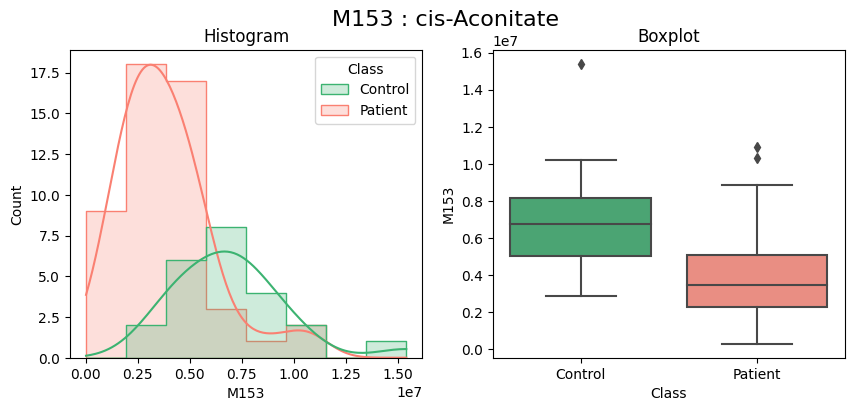

------------------------------------------------------------------------------------------------------------------------


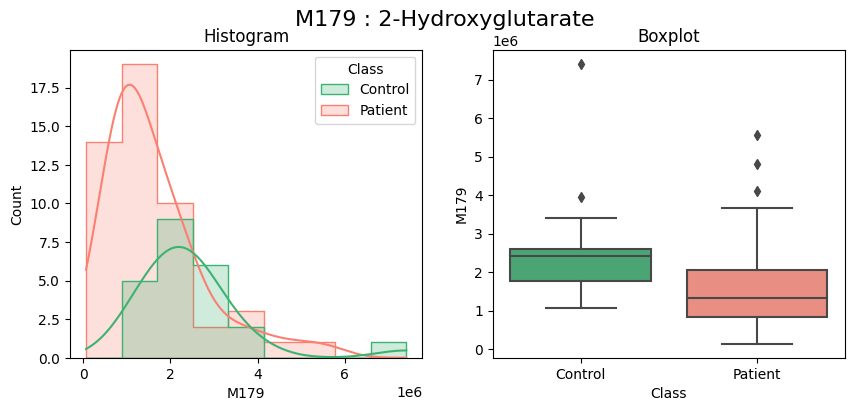

------------------------------------------------------------------------------------------------------------------------


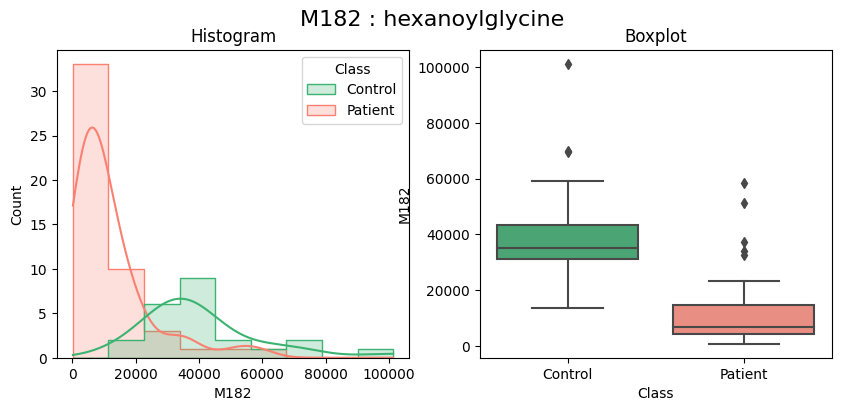

------------------------------------------------------------------------------------------------------------------------


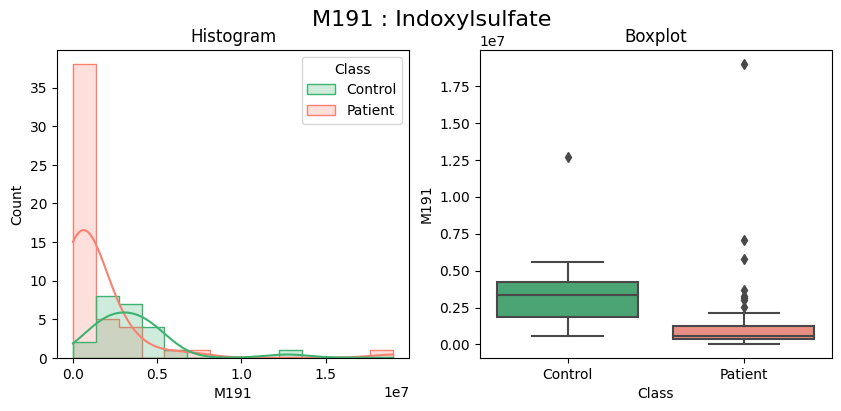

------------------------------------------------------------------------------------------------------------------------


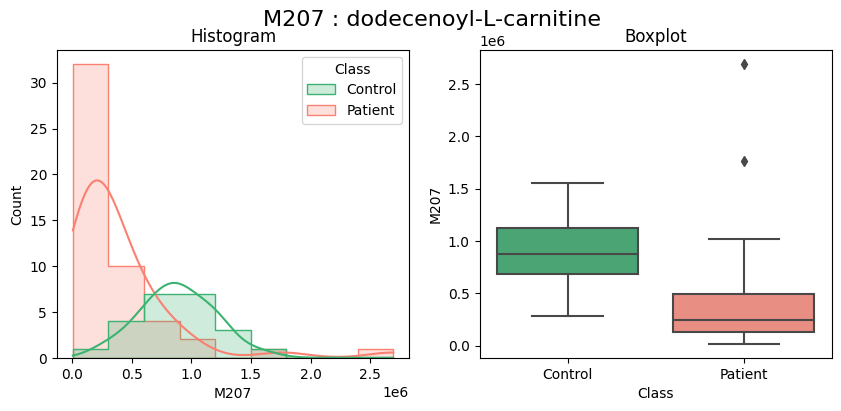

------------------------------------------------------------------------------------------------------------------------


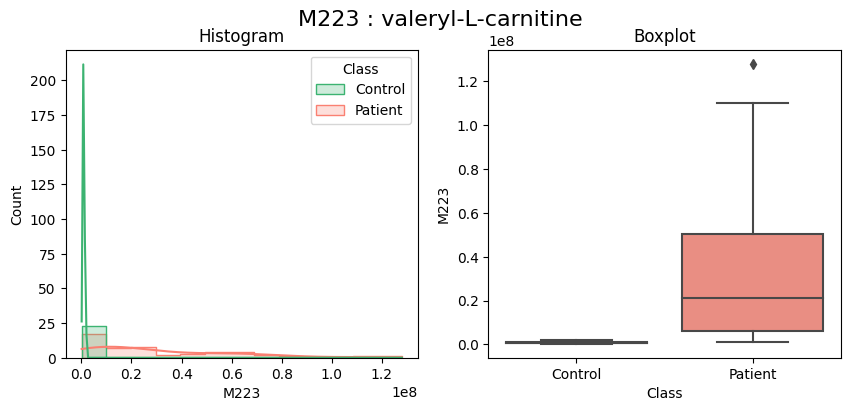

------------------------------------------------------------------------------------------------------------------------


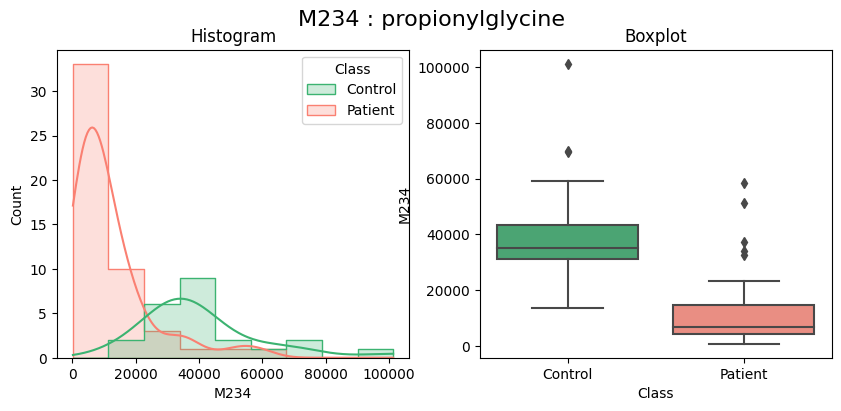

In [251]:
for col in feature_name:
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=peakTable, x=peakTable[col], hue='Class', hue_order=['Control', 'Patient'], kde=True, element='step', palette=palette)
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Class', y=col, data=peakTable, order=['Control', 'Patient'], palette=palette)
    plt.title('Boxplot')
    
    plt.suptitle(col + ' : ' + met_id[met_id['Name'] == col]['Label'].values[0], fontsize=16)
    
    print(120 * '-')
    
    plt.show()

In [269]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

statsmodels==0.12.2
seaborn==0.11.1
scipy==1.5.4
scikit-learn==0.24.2
pandas==1.1.5
numpy==1.19.5
matplotlib==3.3.4


# ML model for classification